In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

df = pd.read_html(
    url, 
    match="Коефіцієнт народжуваності в регіонах України", 
    storage_options={'User-Agent': 'Mozilla/5.0'},
    decimal=',',    # Вказуємо Pandas, що кома — це десятковий дріб
    thousands='.'   # Вказуємо Pandas, що крапка — це розділювач тисяч
)[0]


1-5 Завдання

In [5]:
print("1.Перші рядки таблиці")
df.head()

1.Перші рядки таблиці


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [6]:
print(f"2.Кількість рядків: {df.shape[0]}, Кількість стовпців {df.shape[1]}")
df = df.replace('—', np.nan)

2.Кількість рядків: 28, Кількість стовпців 9


In [7]:
print(f"4.\n{df.dtypes}")

4.
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [8]:
num_columns = df.columns[1:]
df[num_columns] = df[num_columns].apply(pd.to_numeric)
print("5.\n", df.dtypes)

5.
 Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [9]:
missing = df.isnull().sum() / len(df)
print(f"6.Частка пропусків:\n {missing}")

6.Частка пропусків:
 Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [10]:
df = df.iloc[:-1]
print("7\n",df)

7
                Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаїв

In [11]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())
df.isnull().sum()

Регіон    0
1950      0
1960      0
1970      0
1990      0
2000      0
2012      0
2014      0
2019      0
dtype: int64

In [12]:
mean_2019 = df['2019'].mean()
regions_above = df[df['2019'] > mean_2019]['Регіон'].tolist()
print(f"Середній рівень по Україні у 2019: {mean_2019:.2f}")
print(f"9.Регіони з вищою народжуваністю:\n{regions_above}")

Середній рівень по Україні у 2019: 8.02
9.Регіони з вищою народжуваністю:
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


In [13]:
highest_2014 = df['2014'].idxmax()
region_2014 = df.loc[highest_2014, 'Регіон']

print(f"\n Регіон з навищою народжуваністю у 2014: {region_2014}")


 Регіон з навищою народжуваністю у 2014: Рівненська


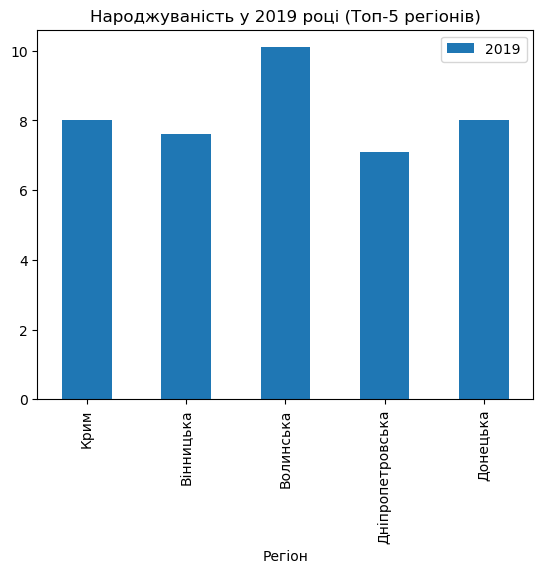

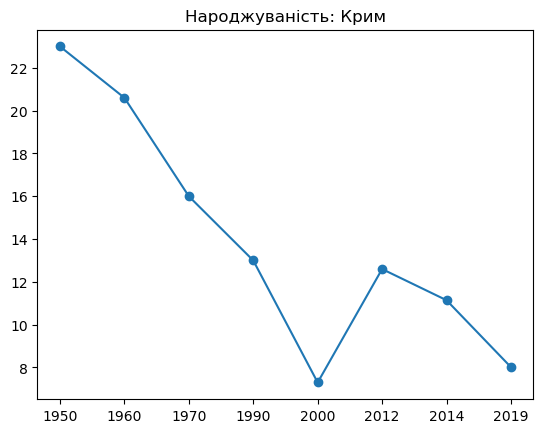

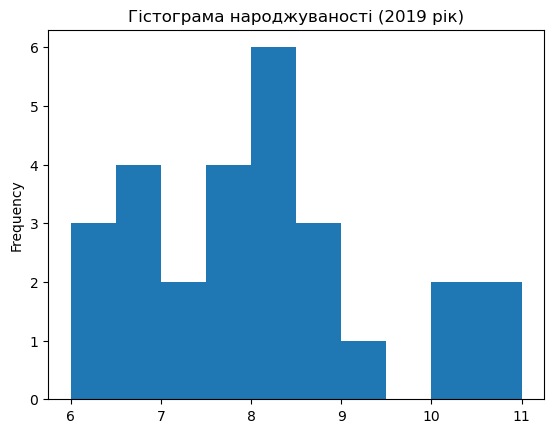

In [14]:
df.head(5).plot(x='Регіон', y='2019', kind='bar', title='Народжуваність у 2019 році (Топ-5 регіонів)')
plt.show()

years = ['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']
df.loc[0, years].plot(kind='line', title='Народжуваність: ' + df.loc[0, 'Регіон'], marker='o')
plt.show()

df['2019'].plot(kind='hist', title='Гістограма народжуваності (2019 рік)')
plt.show()